In [1]:
%cd ..

/home/klen/Desktop/physics/article2/git


In [2]:
import numpy as np

from src.cond_pdt import ConditionalPDTPlot
from src.correlations import SpatialCoherencePlot, get_correlations
from src.entanglement import GaussianEntanglementPlot, WitnessCoherenceCalculator, WitnessCoherencePlot
from src.bell import BellPlot, BellCalculator, BellPlotTime
from src.nonclassicality import NonclassicalityPlot
from src import utils

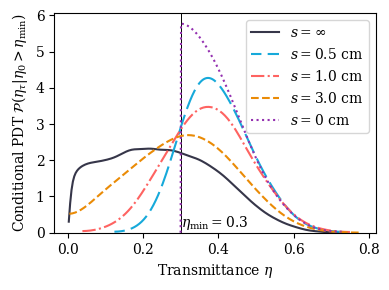

In [3]:
cpdtp = ConditionalPDTPlot(eta_min=0.3)
cpdtp.plot("moderate", aperture_radius=0.014, wind_shift=np.inf)
cpdtp.plot("moderate", aperture_radius=0.014, wind_shift=0.005, ls=(5, (10, 3)), smooth=10)
cpdtp.plot("moderate", aperture_radius=0.014, wind_shift=0.01, ls='-.', smooth=10)
cpdtp.plot("moderate", aperture_radius=0.014, wind_shift=0.03, ls='--', smooth=10)
cpdtp.plot("moderate", aperture_radius=0.014, wind_shift=0, ls=':')
cpdtp.legend()
cpdtp.savefig('supplemental/moderate/cond_pdt.pdf')

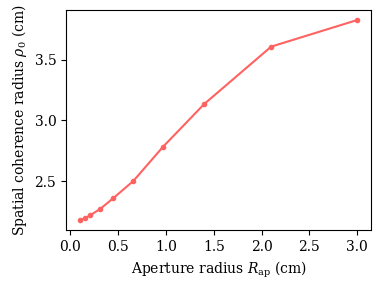

In [4]:
scp = SpatialCoherencePlot()
scp.plot("moderate")
scp.savefig('supplemental/moderate/corr_length.pdf')

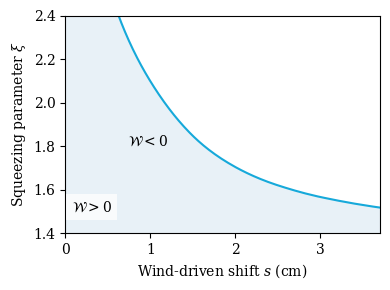

In [5]:
gep = GaussianEntanglementPlot()
gep.plot("moderate", aperture_radius=0.0097)
gep.annotate(pos=((0.02, 0.1), (0.2, 0.4)))
gep.ax.set_xlim(0, 3.7); gep.ax.set_ylim(1.4, 2.4);
gep.savefig('supplemental/moderate/entanglement.pdf')

In [3]:
wcc = WitnessCoherenceCalculator(channels=['moderate'], squeezing=[1.6, 2])
wcc_data = wcc.get()

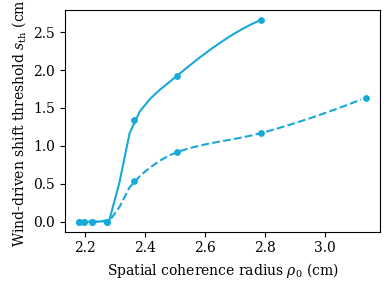

In [4]:
wcp = WitnessCoherencePlot()
wcp.plot(wcc_data, 'moderate', per_xi_kwargs=[{}, {'ls': '--'}])
wcp.savefig("supplemental/moderate/witness_coherence.pdf")

In [16]:
bc = BellCalculator(channel_name='moderate', aperture_radius=0.0045, channel_length_km=1.6, nu=5e-4)
bc_10_0db = bc.get(wind_speed=10, db_p_ms=0)
bc_5_0db = bc.get(wind_speed=5, db_p_ms=0)
bc_10_3db = bc.get(wind_speed=10, db_p_ms=3)
bc_5_3db = bc.get(wind_speed=5, db_p_ms=3)

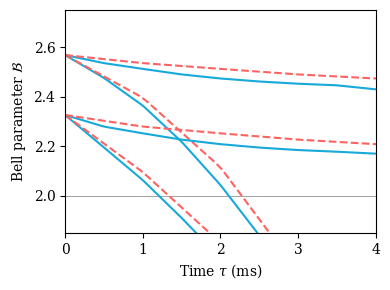

In [23]:
bp = BellPlotTime()
# _params_10 = dict(smooth_value=0.4, bell_kwargs={'color': utils.LINE_COLORS[0]}, pdc_kwargs={'color': utils.LINE_COLORS[1]})
# _params_5 = dict(ls=':', smooth_value=0.4, bell_kwargs={'color': '#7ccfea'}, pdc_kwargs={'color': '#fea8a6'})
_params_10 = dict(smooth_value=0.4, color=utils.LINE_COLORS[0])
_params_5 = dict(ls='--', smooth_value=0.4, color=utils.LINE_COLORS[1])
bp.plot(bc_10_3db, wind_speed=10, **_params_10)
bp.plot(bc_5_3db, wind_speed=5, **_params_5)
bp.plot(bc_10_0db, wind_speed=10, **_params_10)
bp.plot(bc_5_0db, wind_speed=5, **_params_5, )

bp.ax.set_ylim(bottom=1.85, top=2.75)
bp.ax.set_xlim(0, 4)

arrowprops = dict(arrowstyle="->", color='k', shrinkA=5, shrinkB=1,
                  patchA=None, patchB=None, connectionstyle="arc3,rad=-0.2")
def _annotate(dbms, state, pos, textpos):
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[0], textpos, arrowprops=arrowprops, fontsize="x-small")
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[1], textpos, arrowprops=arrowprops, fontsize="x-small", alpha=0)

bp.savefig("supplemental/moderate/bell_time.pdf")

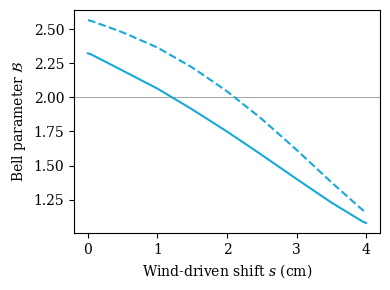

In [6]:
bp = BellPlot()
bc = BellCalculator(channel_name='moderate', aperture_radius=0.0045, 
                    channel_length_km=1.6, nu=5e-4)
bp.plot(bc.get(wind_speed=10, db_p_ms=3), 
        pdc_kwargs={'ls': '-'}, ls='--')
bp.savefig('supplemental/moderate/bell.pdf')

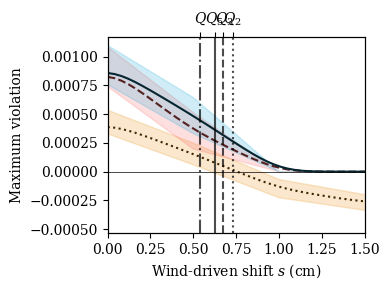

In [15]:
ncp = NonclassicalityPlot()
ncp.eta_min = 0.055
ncp.plot("moderate", aperture_radius=0.0045, channel_length_km=1.6, xlim=(0, 1.5))
ncp.savefig('supplemental/moderate/nonclass.pdf')